<a href="https://colab.research.google.com/github/Baduisef/R_Code-/blob/main/Halima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données

## Importation des packages

In [2]:
install.packages("ade4")
library(factoextra)
library(tidyverse)
library(ade4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘RcppArmadillo’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Importation des données

In [3]:
df <- read.csv("/content/fibromebase.csv",sep=";")
df %>%
  head()

,individus,age,dpr,gestite,parite,statut,ethnie,stade..G
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,fibrome,38,14,1,0,divorce,wolof,
2,fibrome,35,14,0,0,mariee,diola,
3,fibrome,25,16,0,0,celibataire,diola,
4,fibrome,41,14,3,2,mariee,wolof,
5,fibrome,51,16,0,0,celibataire,lebou,
6,fibrome,44,15,3,3,mariee,poulaar,


In [4]:
colSums(is.na(df))

individus       age       dpr   gestite    parite    statut    ethnie  stade..G 
        0         0        23         0         0         0         0         0

In [5]:
length(df$age)

[1] 53

In [6]:
table(df$ethnie)


 Bambara    diola    lebou    Lebou Manjaque     Peul  poulaar   serere 
       1        5        2        1        1        4        7        4 
  Serere     Soce    wolof    Wolof 
       6        3       12        7 

In [7]:
df <- df %>%
  mutate(ethnie_corrige = case_when(
    ethnie %in% c("Wolof", "wolof") ~ "Wolof",
    ethnie %in% c("Serere", "serere") ~ "Serere",
    TRUE ~ ethnie
  ))

table(df$ethnie_corrige)


 Bambara    diola    lebou    Lebou Manjaque     Peul  poulaar   Serere 
       1        5        2        1        1        4        7       10 
    Soce    Wolof 
       3       19 

In [8]:
df <- df %>%
  mutate(individus = as.factor(individus),
         gestite = as.factor(gestite),
         parite= as.factor(parite),
         statut = as.factor(statut))


In [9]:
df %>%
  summary()

    individus       age             dpr        gestite parite         statut  
 fibrome :30   Min.   :25.00   Min.   :12.00   0:17    0:35   celibataire: 9  
 fibromeG:23   1st Qu.:33.00   1st Qu.:14.00   1:18    1:11   divorce    : 2  
               Median :36.00   Median :14.00   2: 9    2: 3   Marie      :23  
               Mean   :37.26   Mean   :14.83   3: 5    3: 1   mariee     :19  
               3rd Qu.:41.00   3rd Qu.:16.00   5: 3    4: 2                   
               Max.   :52.00   Max.   :19.00   7: 1    5: 1                   
                               NA's   :23                                     
    ethnie            stade..G         ethnie_corrige    
 Length:53          Length:53          Length:53         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                    

In [10]:
intervalles <- c(24, 35, 45, 55)

df <- df %>%
  mutate(groupe_age = cut(age, breaks = intervalles,
 labels = c( "25-35", "36-45", "46-52")))

df

individus,age,dpr,gestite,parite,statut,ethnie,stade..G,ethnie_corrige,groupe_age
<fct>,<int>,<int>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<fct>
fibrome,38,14,1,0,divorce,wolof,,Wolof,36-45
fibrome,35,14,0,0,mariee,diola,,diola,25-35
fibrome,25,16,0,0,celibataire,diola,,diola,25-35
fibrome,41,14,3,2,mariee,wolof,,Wolof,36-45
fibrome,51,16,0,0,celibataire,lebou,,lebou,46-52
fibrome,44,15,3,3,mariee,poulaar,,poulaar,36-45
fibrome,48,14,0,0,mariee,poulaar,,poulaar,46-52
fibrome,36,17,0,0,mariee,serere,,Serere,36-45
fibrome,33,14,0,0,celibataire,wolof,,Wolof,25-35


In [11]:
length(df$age)

[1] 53

In [12]:
table(df$groupe_age)



25-35 36-45 46-52 
   24    23     6 

In [13]:
tb <- df %>%
  count(individus) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb

individus,n,proportion,proportion_relatives
<fct>,<int>,<dbl>,<dbl>
fibrome,30,0.566,56.6
fibromeG,23,0.434,43.4


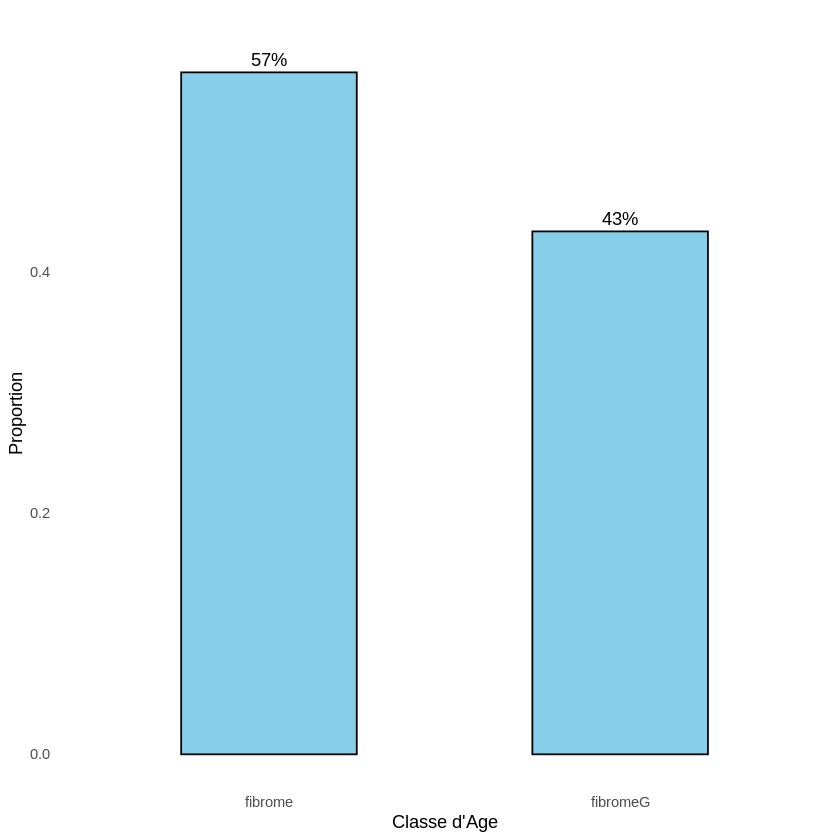

In [14]:
ggplot(tb, aes(x = individus, y = proportion)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "Classe d'Age", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent

In [15]:
tb <- df %>%
  count(groupe_age) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb



groupe_age,n,proportion,proportion_relatives
<fct>,<int>,<dbl>,<dbl>
25-35,24,0.453,45.3
36-45,23,0.434,43.4
46-52,6,0.113,11.3


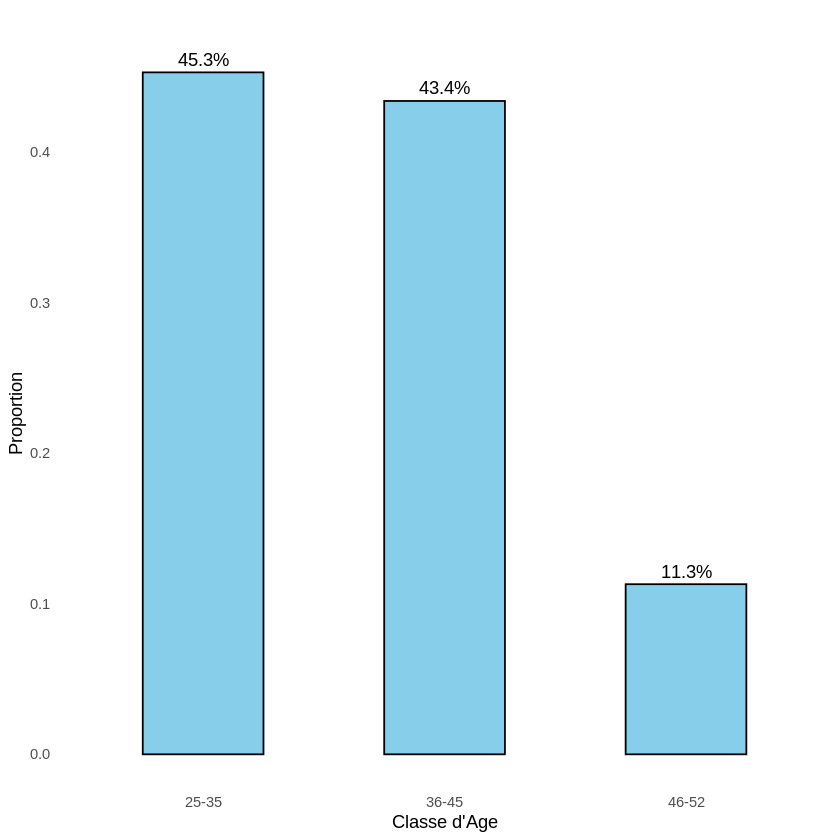

In [16]:
ggplot(tb, aes(x = groupe_age, y = proportion)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "Classe d'Age", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent


In [17]:
tb <- df %>%
  count(gestite) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb


gestite,n,proportion,proportion_relatives
<fct>,<int>,<dbl>,<dbl>
0,17,0.321,32.1
1,18,0.340,34.0
2,9,0.170,17.0
3,5,0.094,9.4
5,3,0.057,5.7
7,1,0.019,1.9


In [18]:
df <- df %>%
  mutate(gestite_1 = case_when(
    gestite %in% c(3, 5, 7) ~ "Plus de 2",
    TRUE ~ as.character(gestite)))

In [19]:
tb <- df %>%
  count(gestite_1) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb


gestite_1,n,proportion,proportion_relatives
<chr>,<int>,<dbl>,<dbl>
0,17,0.321,32.1
1,18,0.340,34.0
2,9,0.170,17.0
Plus de 2,9,0.170,17.0


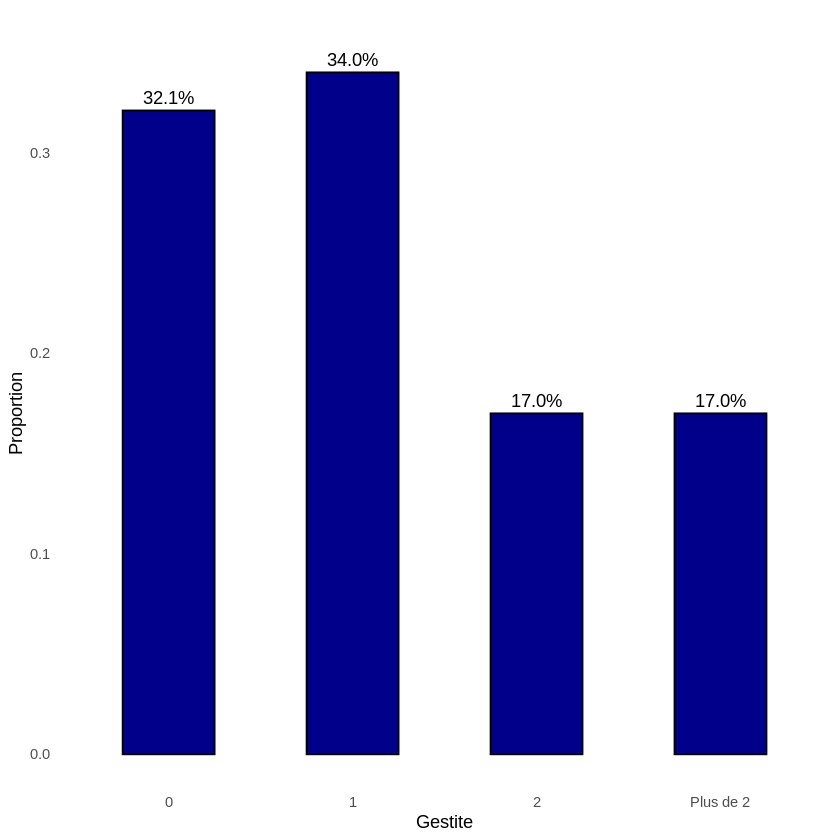

In [20]:
ggplot(tb, aes(x = gestite_1, y = proportion)) +
  geom_bar(stat = "identity", fill = "darkblue", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "Gestite", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent

In [21]:
tb <- df %>%
  count(parite) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb

parite,n,proportion,proportion_relatives
<fct>,<int>,<dbl>,<dbl>
0,35,0.660,66.0
1,11,0.208,20.8
2,3,0.057,5.7
3,1,0.019,1.9
4,2,0.038,3.8
5,1,0.019,1.9


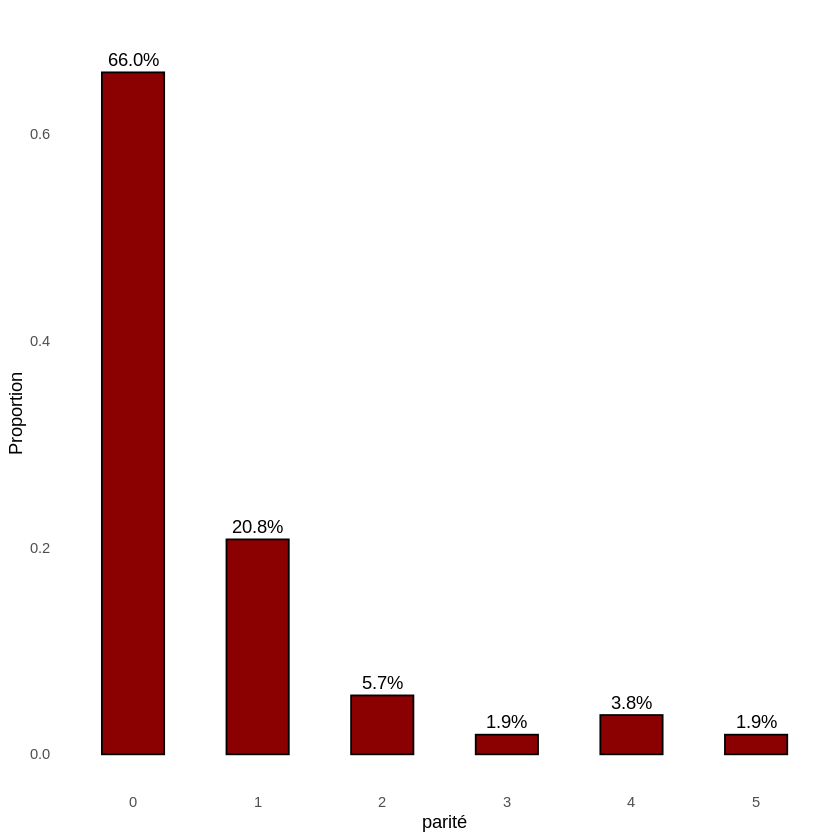

In [22]:
ggplot(tb, aes(x = parite, y = proportion)) +
  geom_bar(stat = "identity", fill = "darkred", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "parité", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent

In [23]:
tb <- df %>%
  count(statut) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb

statut,n,proportion,proportion_relatives
<fct>,<int>,<dbl>,<dbl>
celibataire,9,0.170,17.0
divorce,2,0.038,3.8
Marie,23,0.434,43.4
mariee,19,0.358,35.8


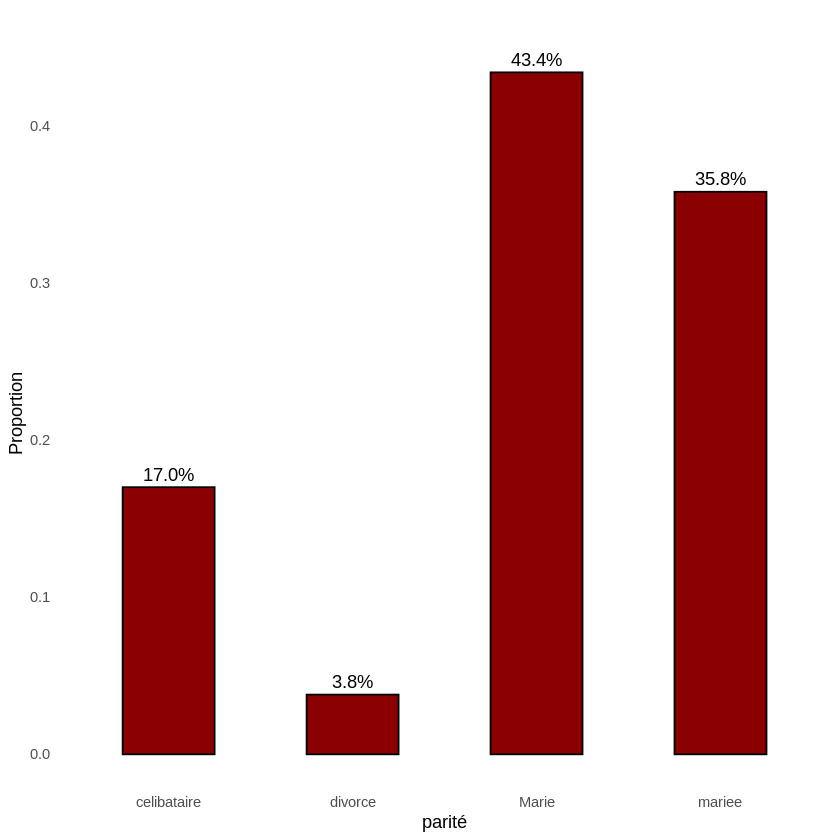

In [24]:
ggplot(tb, aes(x = statut, y = proportion)) +
  geom_bar(stat = "identity", fill = "darkred", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "parité", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent

In [25]:
tb <- df %>%
  count(ethnie_corrige) %>%
  mutate(proportion=round(n/sum(n),3),
         proportion_relatives= proportion*100)

tb

ethnie_corrige,n,proportion,proportion_relatives
<chr>,<int>,<dbl>,<dbl>
Bambara,1,0.019,1.9
Lebou,1,0.019,1.9
Manjaque,1,0.019,1.9
Peul,4,0.075,7.5
Serere,10,0.189,18.9
Soce,3,0.057,5.7
Wolof,19,0.358,35.8
diola,5,0.094,9.4
lebou,2,0.038,3.8


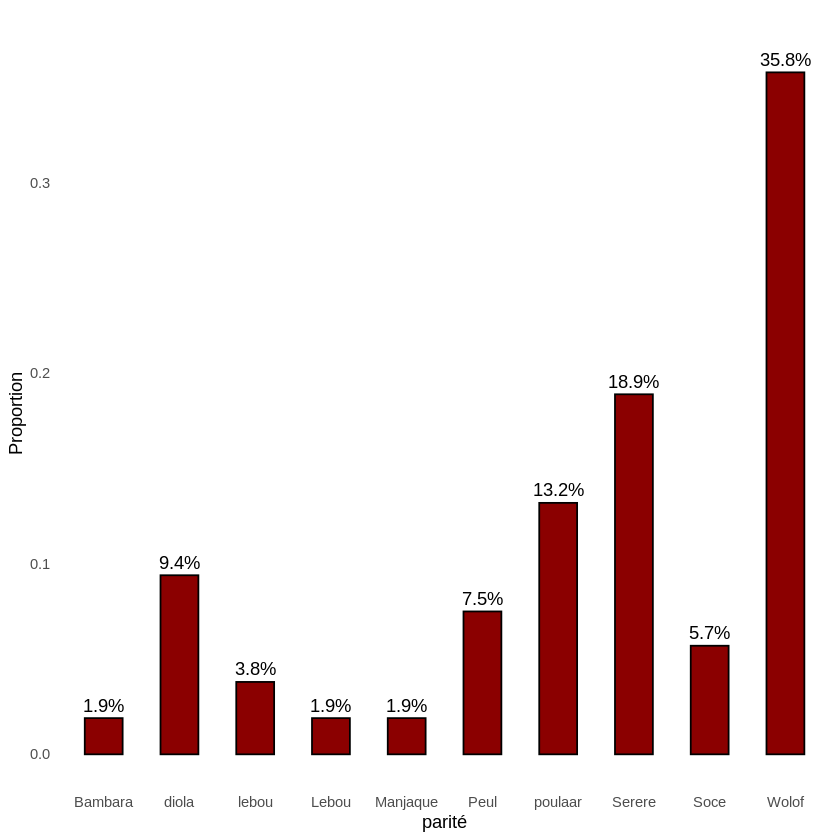

In [26]:
ggplot(tb, aes(x = ethnie_corrige, y = proportion)) +
  geom_bar(stat = "identity", fill = "darkred", color = "black", width = 0.5) +
  geom_text(aes(label = scales::percent(proportion)), vjust = -0.5) +
  labs(title = "", x = "parité", y = "Proportion")+
  theme_minimal() +  # Choisissez un thème minimal
  theme(panel.grid.major = element_blank(),  # Supprimer les lignes de la grille principale
        panel.grid.minor = element_blank(),  # Supprimer les lignes de la grille secondaire
        panel.background = element_blank(),  # Supprimer l'arrière-plan du panel
        plot.background = element_rect(fill = "transparent", color = NA))  # Arrière-plan transparent

In [27]:
df <- df %>%
  mutate(fib = ifelse(individus == "fibrome", 1,0))
df <- df %>%
  mutate(fib_G = ifelse(individus == "fibromeG", 1,0))

head(df)

,individus,age,dpr,gestite,parite,statut,ethnie,stade..G,ethnie_corrige,groupe_age,gestite_1,fib,fib_G
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<dbl>,<dbl>
1,fibrome,38,14,1,0,divorce,wolof,,Wolof,36-45,1,1,0
2,fibrome,35,14,0,0,mariee,diola,,diola,25-35,0,1,0
3,fibrome,25,16,0,0,celibataire,diola,,diola,25-35,0,1,0
4,fibrome,41,14,3,2,mariee,wolof,,Wolof,36-45,Plus de 2,1,0
5,fibrome,51,16,0,0,celibataire,lebou,,lebou,46-52,0,1,0
6,fibrome,44,15,3,3,mariee,poulaar,,poulaar,36-45,Plus de 2,1,0


In [28]:
table(df$fib_G)


 0  1 
30 23 

## Test de Proportion:
L'hypothèse nulle (H0) dans un test de proportion est généralement formulée comme suit :

H0 : Il n'y a pas de différence significative entre les proportions observées dans les échantillons. Autrement dit, les proportions dans les deux groupes sont égales.

$$ H_0: P1=P2 $$

Cela signifie que toute différence observée entre les proportions est due au hasard, et qu'il n'y a pas de véritable effet ou différence entre les deux groupes dans la population sous-jacente.

L'hypothèse alternative (H1), qui est généralement opposée à l'hypothèse nulle, affirmerait alors qu'il existe une différence significative entre les proportions dans les deux groupes.

$$ H_1: P1 \neq P2$$

In [29]:
test_prop <- prop.test(table(df$fib, df$fib_G))
test_prop


	2-sample test for equality of proportions with continuity correction

data:  table(df$fib, df$fib_G)
X-squared = 49.007, df = 1, p-value = 2.55e-12
alternative hypothesis: two.sided
95 percent confidence interval:
 -1.0000000 -0.9615942
sample estimates:
prop 1 prop 2 
     0      1 


## Classification ascendante hiérarchique (CAH):

Il existe de nombreuses techniques statistiques visant à partinionner une population en différentes classes ou sous-groupes. La classification ascendante hiérarchique (CAH) est l’une d’entre elles. On cherche à ce que les individus regroupés au sein d’une même classe (homogénéité intra-classe) soient le plus semblables possibles tandis que les classes soient le plus dissemblables (hétérogénéité inter-classe).

Le principe de la CAH est de rassembler des individus selon un critère de ressemblance défini au préalable qui s’exprimera sous la forme d’une matrice de distances, exprimant la distance existant entre chaque individu pris deux à deux. Deux observations identiques auront une distance nulle. Plus les deux observations seront dissemblables, plus la distance sera importante. La CAH va ensuite rassembler les individus de manière itérative afin de produire un dendrogramme ou arbre de classification. La classification est ascendante car elle part des observations individuelles ; elle est hiérarchique car elle produit des classes ou groupes de plus en plus vastes, incluant des sous-groupes en leur sein. En découpant cet arbre à une certaine hauteur choisie, on produira la partition désirée.

Parmi les distance qui permettent de calculer la matrice de distance nous avons:
.Distance du Chi-deux:

$$d_{\chi^2}(x, y) = \sum_{i=1}^{n} \frac{(x_i - y_i)^2}{x_i + y_i}$$
Cette mesure est souvent utilisée pour comparer les distributions de fréquence entre les modalités des variables catégorielles.

.  La distance euclienne:

$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
Bien que moins courante dans l'ACM, la distance euclidienne peut être utilisée dans certains cas où les données sont considérées comme approximativement continues ou pseudo-continues.

. Distance de Manhattan:

$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$
 Aussi connue sous le nom de distance de la ville, elle est souvent utilisée pour les données catégorielles et mesure la distance entre les points en calculant la somme des différences absolues des coordonnées.

 . Distance de Gower: La distance de Gower est utilisée pour mesurer la dissimilarité entre des individus lorsqu'on a des données mixtes (variables catégorielles et continues). La formule générale de la distance de Gower est donnée par :

 $$d_{ij} = \frac{\sum_{k=1}^{p} w_k \delta_{ijk}}{\sum_{k=1}^{p} w_k}$$

Où :

    d_ij​ est la distance entre les individus i et j,
    p est le nombre total de variables,
    w_k​ est le poids attribué à la variable kk (par exemple, 1 pour les variables binaires, inversément proportionnel à l'amplitude pour les variables continues, etc.),
    δ_ijk​ est la fonction de dissimilarité entre les individus i et j pour la variable k. Cette fonction peut être définie différemment selon le type de variable (binaire, nominale, ordinale, numérique).

  





### Application de l'ACM
Application l'ACM à nous données pour ensuite tirer la matrice de distance

In [30]:
names(df)

[1] "individus"      "age"            "dpr"            "gestite"       
 [5] "parite"         "statut"         "ethnie"         "stade..G"      
 [9] "ethnie_corrige" "groupe_age"     "gestite_1"      "fib"           
[13] "fib_G"

In [31]:
df2 <- df %>%
  select(individus,parite,gestite,statut,ethnie_corrige,groupe_age)
head(df2)

,individus,parite,gestite,statut,ethnie_corrige,groupe_age
,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
1,fibrome,0,1,divorce,Wolof,36-45
2,fibrome,0,0,mariee,diola,25-35
3,fibrome,0,0,celibataire,diola,25-35
4,fibrome,2,3,mariee,Wolof,36-45
5,fibrome,0,0,celibataire,lebou,46-52
6,fibrome,3,3,mariee,poulaar,36-45


In [32]:
df2 <- df2 %>%
  mutate(individus = as.factor(individus),
         gestite = as.factor(gestite),
         parite= as.factor(parite),
         statut = as.factor(statut),
         groupe_age = as.factor(groupe_age),
         ethnie_corrige = as.factor(ethnie_corrige))

In [33]:
# @title
#df2$ <- ifelse(is.na(df$colonne_qualitative), mode(df$colonne_qualitative, na.rm = TRUE), df$colonne_qualitative)

In [34]:
acm <- dudi.acm(df2, scannf = FALSE, nf = 5)

In [35]:
matrice_dist <- dist.dudi(acm)

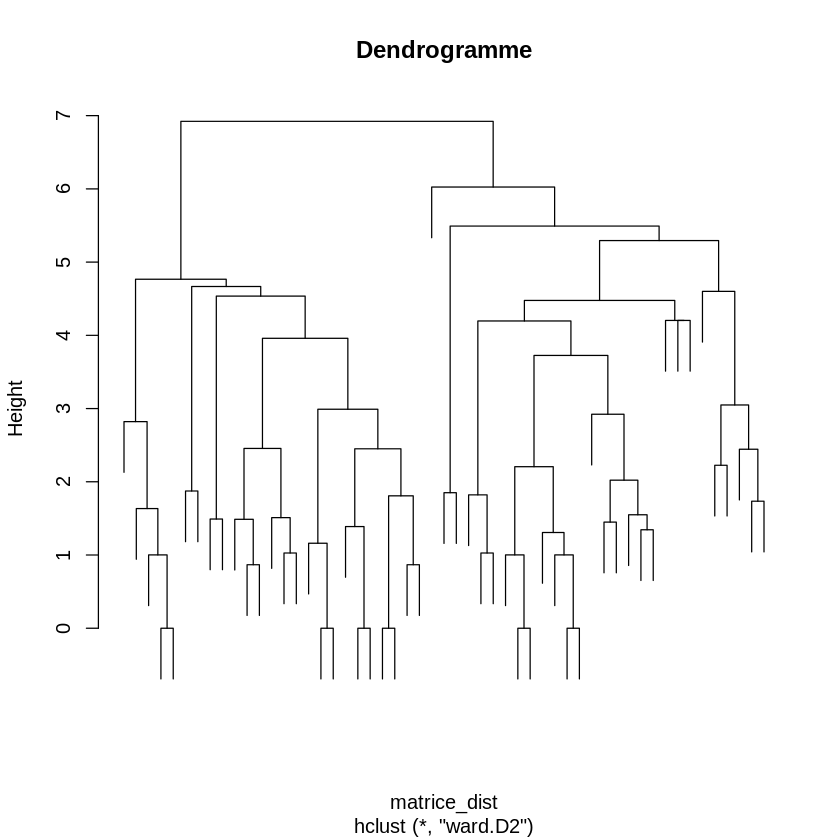

In [36]:
arbre <- hclust(matrice_dist, method = "ward.D2")
plot(arbre, labels = FALSE, main = "Dendrogramme")

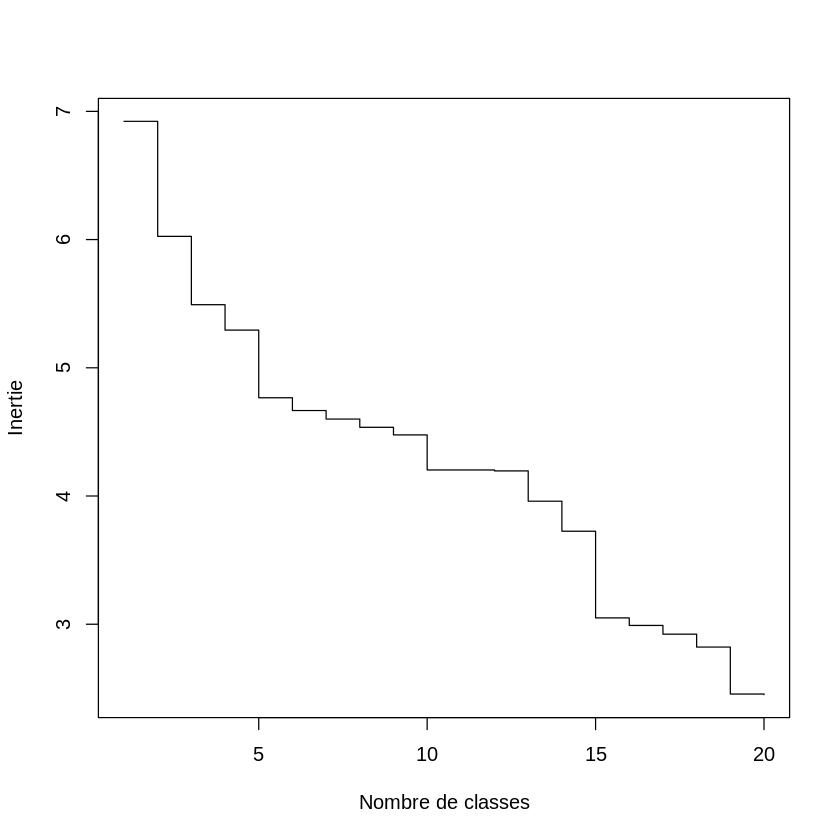

In [37]:
inertie <- sort(arbre$height, decreasing = TRUE)
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")

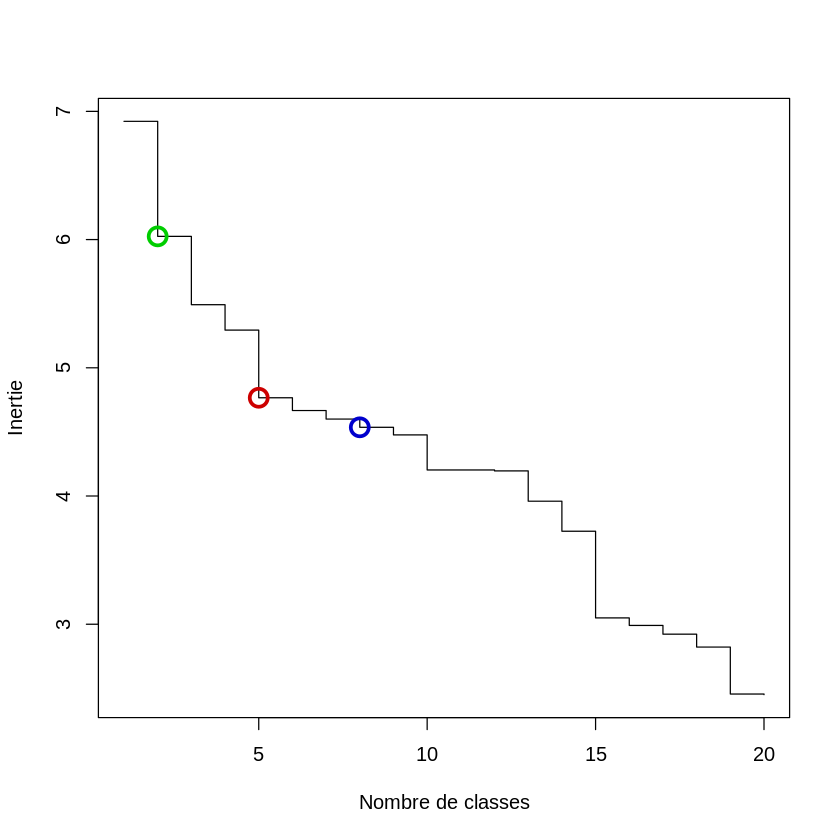

In [38]:
plot(inertie[1:20], type = "s", xlab = "Nombre de classes", ylab = "Inertie")
points(c(2, 5, 8), inertie[c(2, 5, 8)], col = c("green3", "red3", "blue3"), cex = 2, lwd = 3)

In [1]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




Warning message in data.frame(xmin = unlist(xleft), ymin = unlist(ybottom), xmax = unlist(xright), :
“row names were found from a short variable and have been discarded”


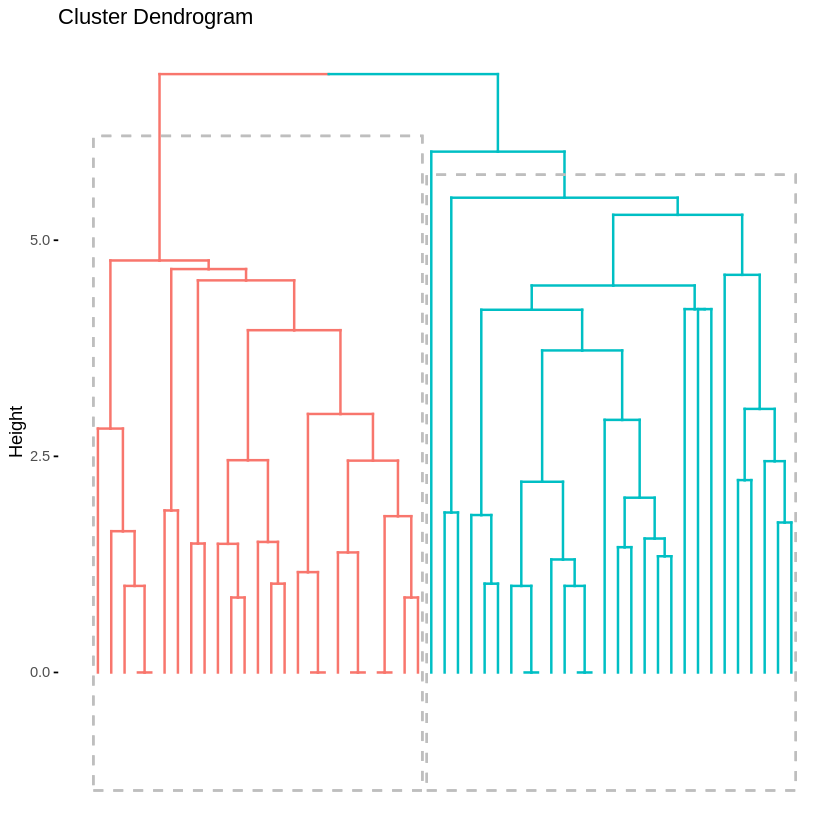

In [41]:
fviz_dend(arbre, k = 2, show_labels = FALSE, rect = TRUE)

In [48]:
typo <- cutree(arbre, 2)
table(typo)

typo
 1  2 
25 28 

In [49]:
df2$typo <- cutree(arbre, 2)

In [ ]:
#install.packages("gtsummary")
library(gtsummary)
tab<-df2 %>%
  tbl_summary(by = typo)

as_gt(tab)


In [53]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’




Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
“Chi-squared approximation may be inc

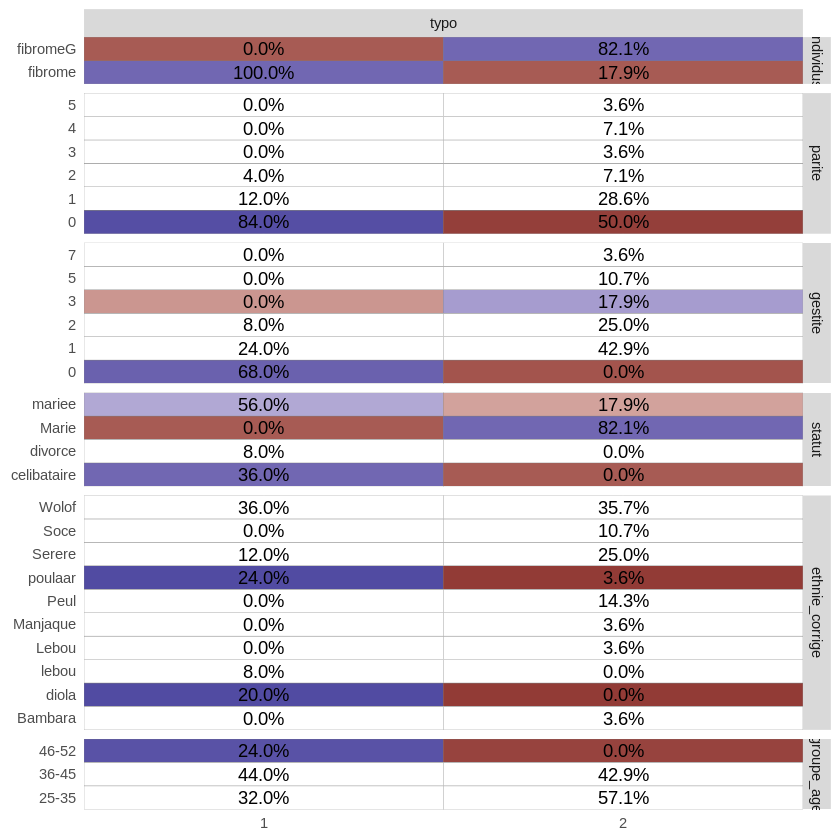

In [68]:
library(GGally)
df2$typo <- factor(df2$typo)
ggtable(
  df2,
  columnsX = "typo",
  columnsY = names(df2)[1:6],
  cells = "col.prop",
  fill = "std.resid"
) +
  labs(fill = "Résidus standardizés du Chi²") +
  theme(legend.position = "bottom")